In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Load the dataset (assuming you have the Mall Customer Segmentation Dataset in CSV format)
data = pd.read_csv('Mall_Customers.csv')  # Replace with your dataset path

In [ ]:
# Show basic information and first few rows
print(data.info())
print(data.head())

# EDA - Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())

# Data Preprocessing - Drop the 'CustomerID' column (not relevant for clustering)
data = data.drop('CustomerID', axis=1)

# Normalize the data (Standardization)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                 

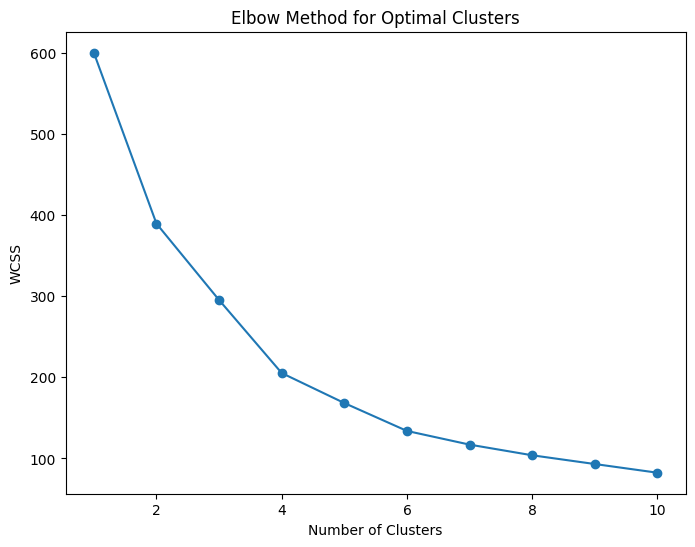

In [ ]:
# K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the Elbow plot, we can choose the optimal number of clusters, say 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

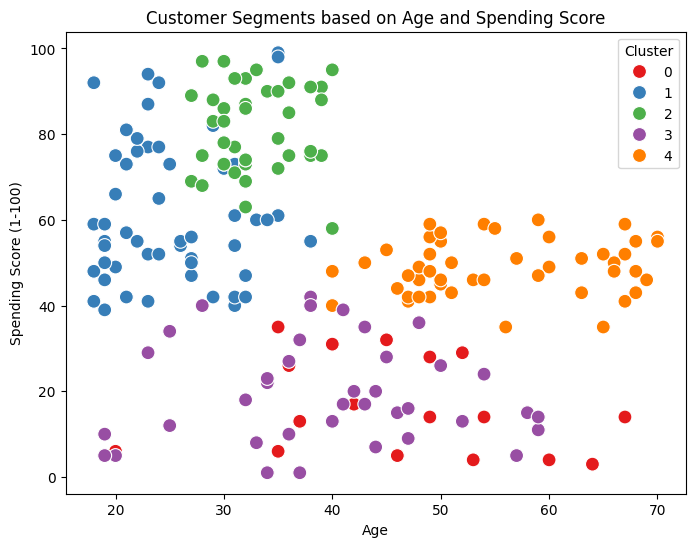

In [ ]:
# Visualizing the clusters (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

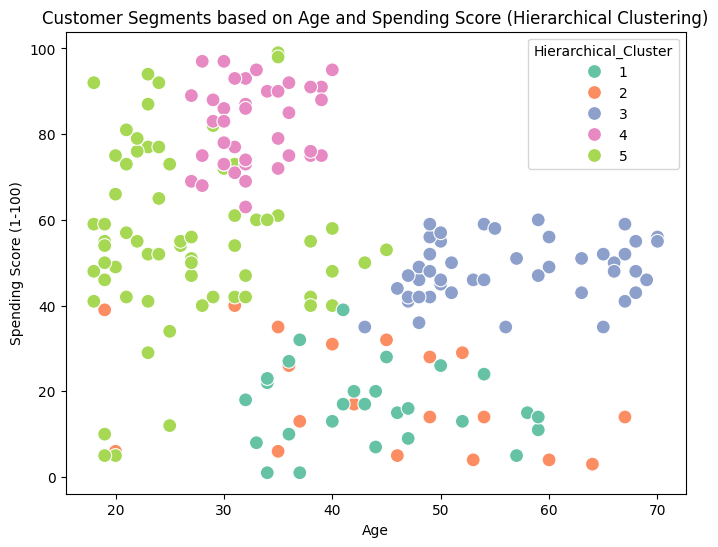

In [ ]:
# Based on the dendrogram, we can cut the tree at an appropriate level (e.g., 5 clusters)
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward') # Use 'ward' method or another appropriate method
# Creating clusters
hierarchical_clusters = fcluster(linked, 5, criterion='maxclust')

# Add hierarchical cluster labels to the data
data['Hierarchical_Cluster'] = hierarchical_clusters

# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Hierarchical_Cluster'], palette='Set2', s=100)
plt.title('Customer Segments based on Age and Spending Score (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:

# Silhouette Score - Evaluate the quality of the K-Means clusters
sil_score = silhouette_score(data_scaled, y_kmeans)
print(f"Silhouette Score for K-Means Clustering: {sil_score:.4f}")

# Interpreting the Clusters
# Select only numeric columns before calculating the mean
numeric_data = data.select_dtypes(include=np.number)
cluster_means = numeric_data.groupby('Cluster').mean()
print(cluster_means)

Silhouette Score for K-Means Clustering: 0.4166
               Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        46.250000           26.750000               18.350000   
1        25.185185           41.092593               62.240741   
2        32.875000           86.100000               81.525000   
3        39.871795           86.102564               19.358974   
4        55.638298           54.382979               48.851064   

         Hierarchical_Cluster  
Cluster                        
0                    2.000000  
1                    4.888889  
2                    4.025000  
3                    2.025641  
4                    3.170213  
